In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import  cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout ,Rescaling
from tensorflow.keras.callbacks import EarlyStopping
from collections import Counter
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.callbacks import ModelCheckpoint

In [5]:
print('GPU:', tf.config.list_physical_devices('GPU'))

GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [6]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [7]:
# cifar10.lo

In [8]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse",	"ship",	"truck"]

In [9]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

/tmp/ipykernel_44092/4003865314.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


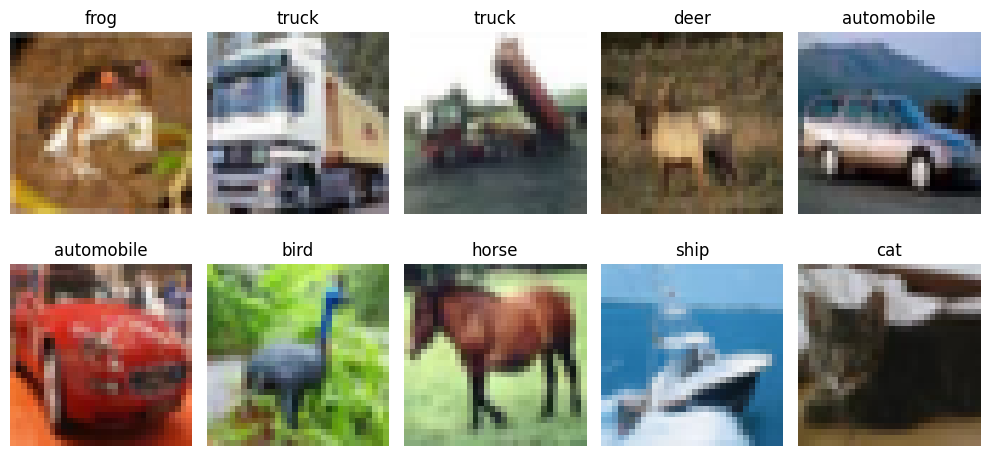

In [10]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[int(y_train[i])])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [11]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], shape=(50000, 1), dtype=uint8)

In [12]:
# [6,9]

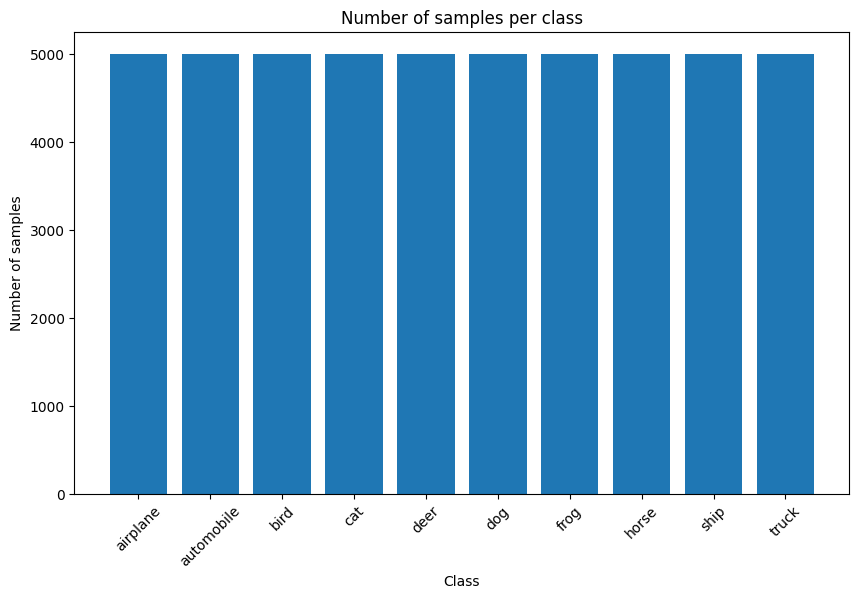

airplane: 5000
automobile: 5000
bird: 5000
cat: 5000
deer: 5000
dog: 5000
frog: 5000
horse: 5000
ship: 5000
truck: 5000


In [13]:
labels = y_train.flatten()

# Count the number of samples per class
class_counts = Counter(labels)

# Sort by class index
classes = sorted(class_counts.keys())
counts = [class_counts[c] for c in classes]


# Plotting
plt.figure(figsize=(10, 6))
plt.bar(class_names, counts)
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.title('Number of samples per class')
plt.xticks(rotation=45)
plt.show()

# Optional: print counts for reference
for cls, count in zip(class_names, counts):
    print(f"{cls}: {count}")

In [14]:
labels

array([6, 9, 9, ..., 9, 1, 1], shape=(50000,), dtype=uint8)

In [15]:
print(y_train.shape)
print(y_test.shape)

(50000, 1)
(10000, 1)


In [16]:
X_train.shape

(50000, 32, 32, 3)

In [17]:
X_test.shape

(10000, 32, 32, 3)

In [18]:
# cat or 0 = [0,1,0,0,0,]

In [19]:
# Convert labels to one-hot vectors
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# Create a preprocessing layer for normalization
normalization_layer = Rescaling(1./255)
X_train = normalization_layer(X_train)
X_test = normalization_layer(X_test)

I0000 00:00:1756459499.566047   44092 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1767 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [20]:
X_train

<tf.Tensor: shape=(50000, 32, 32, 3), dtype=float32, numpy=
array([[[[0.23137257, 0.24313727, 0.24705884],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607845, 0.18823531, 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352945],
         [0.59607846, 0.4901961 , 0.40000004],
         [0.5803922 , 0.48627454, 0.4039216 ]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235297, 0.34509805, 0.21568629],
         [0.4666667 , 0.3254902 , 0.19607845],
         [0.4784314 , 0.34117648, 0.22352943]],

        [[0.09803922, 0.09411766, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215688, 0.10588236, 0.03137255],
         ...,
         [0.46274513, 0.32941177, 0.19607845],
         [0.47058827, 0.32941177, 0.19607845],
         [0.427451  , 0.28627452, 0.16470589]],

        ...,

        [[0.81568635, 0.6666667 

In [21]:
early_stopping = EarlyStopping(
    monitor='val_loss',   # metric to monitor
    patience=3,           # stop if no improvement after 3 epochs
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

In [22]:
def build_cnn():

    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(256, activation='relu'),
        # Dropout(0.25),
        Dense(10, activation='softmax')
    ])
    return model

In [23]:
model_adam = build_cnn()
model_sgd = build_cnn()

/home/vinyj/tf220/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model_adam.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history_adam = model_adam.fit(X_train, y_train_cat, epochs=40, validation_data=(X_test, y_test_cat),batch_size = 64, callbacks = checkpoint)

Epoch 1/40


2025-08-29 11:25:03.947302: I external/local_xla/xla/service/service.cc:163] XLA service 0x703c60005720 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-08-29 11:25:03.947392: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-08-29 11:25:04.005377: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-08-29 11:25:04.361774: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91200


  8/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.0927 - loss: 2.2963

I0000 00:00:1756459510.289290   44258 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3319 - loss: 1.7919
Epoch 1: val_loss improved from None to 1.33575, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.4262 - loss: 1.5559 - val_accuracy: 0.5208 - val_loss: 1.3357
Epoch 2/40
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5559 - loss: 1.2338
Epoch 2: val_loss improved from 1.33575 to 1.09499, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5781 - loss: 1.1838 - val_accuracy: 0.6159 - val_loss: 1.0950
Epoch 3/40
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6300 - loss: 1.0479
Epoch 3: val_loss improved from 1.09499 to 1.00521, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6411 - loss: 1.0208 - val_accuracy: 0.6484 - val_loss: 1.0052
Epoch 4/40
778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6787 - loss: 0.9132
Epoch 4: val_loss improved from 1.00521 to 0.98385, saving mo

In [25]:
# model_adam.save("model_adamv_1.keras")

In [26]:
checkpoint_sgd = ModelCheckpoint(
    filepath='best_model_sgd_v1.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

In [27]:
model_sgd.compile(optimizer= optimizers.SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
history_sgd = model_sgd.fit(X_train, y_train_cat, epochs=40, validation_data=(X_test, y_test_cat),batch_size = 64,callbacks = checkpoint_sgd)

Epoch 1/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1519 - loss: 2.2751
Epoch 1: val_loss improved from None to 2.14695, saving model to best_model_sgd_v1.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.1963 - loss: 2.2134 - val_accuracy: 0.2164 - val_loss: 2.1469
Epoch 2/40
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2731 - loss: 1.9866
Epoch 2: val_loss improved from 2.14695 to 1.84687, saving model to best_model_sgd_v1.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.2930 - loss: 1.9390 - val_accuracy: 0.3245 - val_loss: 1.8469
Epoch 3/40
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3495 - loss: 1.8029
Epoch 3: val_loss improved from 1.84687 to 1.67411, saving model to best_model_sgd_v1.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.3660 - loss: 1.7562 - val_accuracy: 0.3871 - val_loss: 1.6741
Epoch 4/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4081 - loss: 1.6427
Epoch 4: val_loss improved fr

In [28]:
def loss_accuracy(model):
    loss, accuracy = model.evaluate(X_test,y_test_cat)
    print(f"Test accuracy for the model: {accuracy:.4f}")
    print(f"Test loss for the model: {loss:.4f}")



In [29]:
model_sgd.save("model_sgd_v1.keras")

In [30]:
from tensorflow.keras.models import load_model

In [31]:
load_adam_best = load_model("best_model.keras")

In [32]:
load_sgd_best = load_model("best_model_sgd_v1.keras")

In [33]:
loss_accuracy(load_adam_best)
loss_accuracy(load_sgd_best)

2025-08-29 11:33:38.764039: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_151', 16 bytes spill stores, 16 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7206 - loss: 0.8482
Test accuracy for the model: 0.7206
Test loss for the model: 0.8482
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6706 - loss: 0.9848
Test accuracy for the model: 0.6706
Test loss for the model: 0.9848


In [34]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train)

In [36]:
model_adam_aug = build_cnn()

model_adam_aug.compile(
    optimizer=optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_adam_aug = model_adam_aug.fit(
    datagen.flow(X_train, y_train_cat, batch_size=64),
    epochs=25,
    steps_per_epoch=len(X_train) // 64,
    validation_data=(X_test, y_test_cat),
    callbacks= ModelCheckpoint(filepath='best_model_adam_aug_v1.keras', monitor='val_loss',save_best_only=True, mode='min', verbose=1),
    verbose=1
)

Epoch 1/25


/home/vinyj/tf220/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


780/781 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3016 - loss: 1.8699
Epoch 1: val_loss improved from None to 1.39924, saving model to best_model_adam_aug_v1.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 38s 42ms/step - accuracy: 0.3822 - loss: 1.6691 - val_accuracy: 0.4888 - val_loss: 1.3992
Epoch 2/25
  1/781 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.5938 - loss: 1.3058

/home/vinyj/tf220/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_loss improved from 1.39924 to 1.35653, saving model to best_model_adam_aug_v1.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5938 - loss: 1.3058 - val_accuracy: 0.5094 - val_loss: 1.3565
Epoch 3/25
780/781 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4993 - loss: 1.3894
Epoch 3: val_loss improved from 1.35653 to 1.21769, saving model to best_model_adam_aug_v1.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.5188 - loss: 1.3421 - val_accuracy: 0.5731 - val_loss: 1.2177
Epoch 4/25
  1/781 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6250 - loss: 1.2431
Epoch 4: val_loss did not improve from 1.21769
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6250 - loss: 1.2431 - val_accuracy: 0.5670 - val_loss: 1.2285
Epoch 5/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5625 - loss: 1.2357
Epoch 5: val_loss improved from 1.21769 to 1.07752, saving model to best_model_adam_aug_v1.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - ac

In [37]:
load_aug_adam = load_model("best_model_adam_aug_v1.keras")

In [39]:
loss_accuracy(load_aug_adam)

  1/313 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.8438 - loss: 0.5186

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7441 - loss: 0.7392
Test accuracy for the model: 0.7441
Test loss for the model: 0.7392


In [40]:
def metrics_scoring(model_name):
  y_pred_probs = model_name.predict(X_test)
  y_pred = y_pred_probs.argmax(axis=1)
  y_true = y_test_cat.argmax(axis=1)
  acc = accuracy_score(y_true, y_pred)
  prec = precision_score(y_true, y_pred, average='weighted')
  rec = recall_score(y_true, y_pred, average='weighted')
  f1 = f1_score(y_true, y_pred, average='weighted')
  print(f"Accuracy: {acc:.4f}")
  print(f"Precision: {prec:.4f}")
  print(f"Recall: {rec:.4f}")
  print(f"F1 Score: {f1:.4f}")


In [41]:
metrics_scoring(load_aug_adam)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Accuracy: 0.7441
Precision: 0.7467
Recall: 0.7441
F1 Score: 0.7411


In [42]:
metrics_scoring(load_adam_best)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Accuracy: 0.7206
Precision: 0.7331
Recall: 0.7206
F1 Score: 0.7233


In [43]:
model_sgd_aug = build_cnn()

model_sgd_aug.compile(
    optimizer=optimizers.SGD(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_sgd_aug = model_adam_aug.fit(
    datagen.flow(X_train, y_train_cat, batch_size=64),
    epochs=25,
    steps_per_epoch=len(X_train) // 64,
    validation_data=(X_test, y_test_cat),
    callbacks= ModelCheckpoint(filepath='best_model_sgd_aug_v1.keras', monitor='val_loss',save_best_only=True, mode='min', verbose=1),
    verbose=1
)

Epoch 1/25


/home/vinyj/tf220/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/vinyj/tf220/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7295 - loss: 0.7720
Epoch 1: val_loss improved from None to 0.81862, saving model to best_model_sgd_aug_v1.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.7260 - loss: 0.7754 - val_accuracy: 0.7220 - val_loss: 0.8186
Epoch 2/25
  1/781 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.7656 - loss: 0.7779

/home/vinyj/tf220/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_loss did not improve from 0.81862
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7656 - loss: 0.7779 - val_accuracy: 0.7222 - val_loss: 0.8240
Epoch 3/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7301 - loss: 0.7662
Epoch 3: val_loss improved from 0.81862 to 0.79635, saving model to best_model_sgd_aug_v1.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.7293 - loss: 0.7665 - val_accuracy: 0.7293 - val_loss: 0.7964
Epoch 4/25
  1/781 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.8125 - loss: 0.5852
Epoch 4: val_loss did not improve from 0.79635
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8125 - loss: 0.5852 - val_accuracy: 0.7277 - val_loss: 0.8056
Epoch 5/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7383 - loss: 0.7464
Epoch 5: val_loss did not improve from 0.79635
781/781 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.7370 - loss: 0.7467 - val_accuracy: 0.7352 - val_loss: 0.7986
Epoch 6/25
  1/781 ━━━━━━━━━

In [44]:
load_sgd_aug = load_model("best_model_sgd_aug_v1.keras")

In [45]:
loss_accuracy(load_sgd_aug)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7785 - loss: 0.6690
Test accuracy for the model: 0.7785
Test loss for the model: 0.6690


In [46]:
metrics_scoring(load_sgd_aug)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Accuracy: 0.7785
Precision: 0.7789
Recall: 0.7785
F1 Score: 0.7731


In [47]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plt_confusion_matrix(model):
    y_pred = model.predict(X_test).argmax(axis=1)
    y_true = y_test_cat.argmax(axis=1)
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


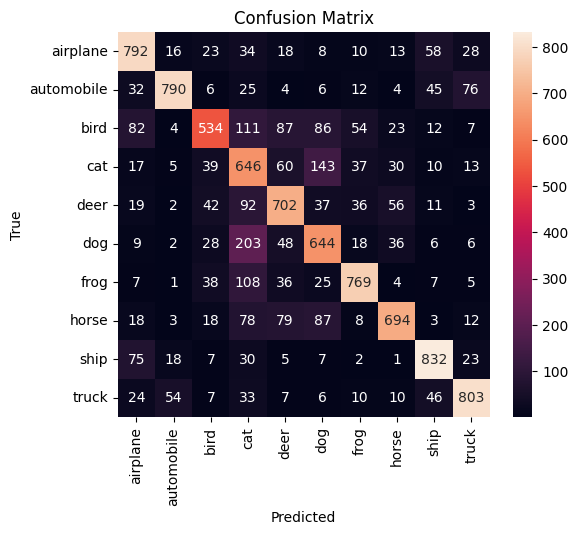

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


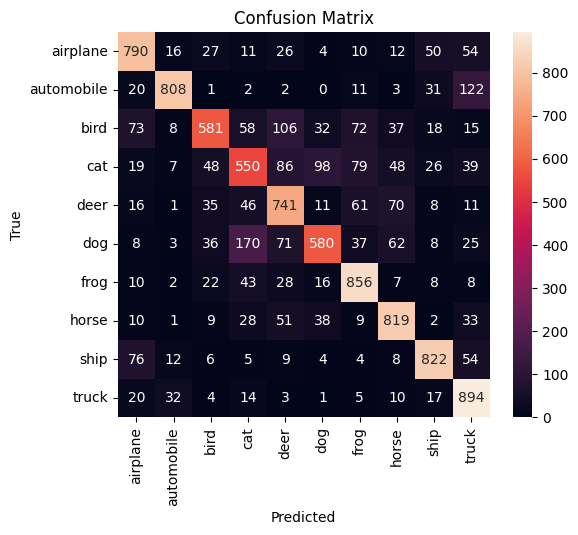

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


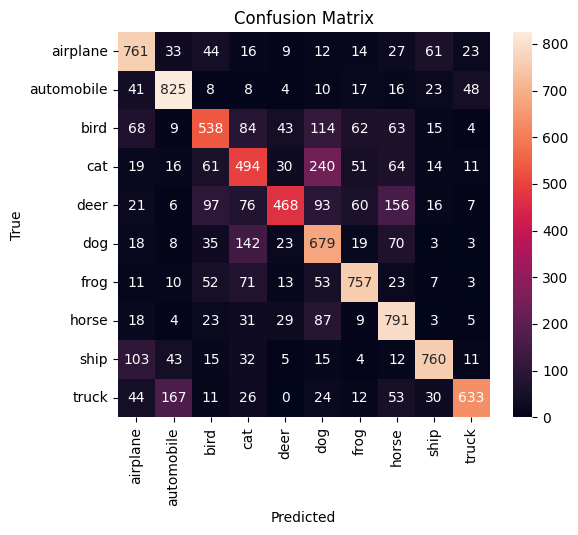

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


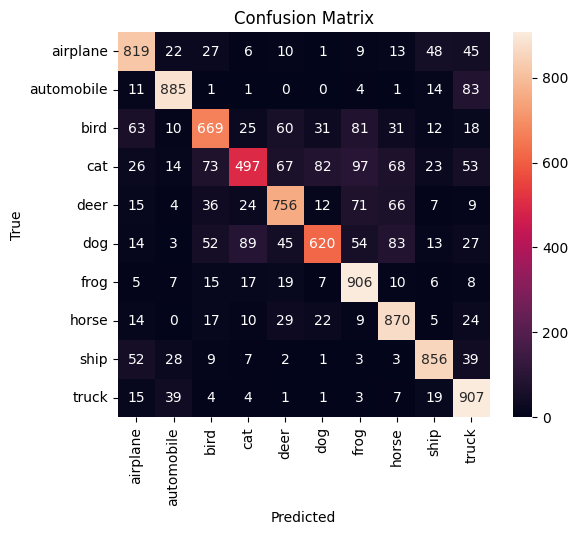

In [48]:
plt_confusion_matrix(load_adam_best)
plt_confusion_matrix(load_aug_adam)
plt_confusion_matrix(load_sgd_best)
plt_confusion_matrix(load_sgd_aug)

In [49]:
def build_cnn_more_layer():
    model_more = Sequential([
        Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        MaxPooling2D(2, 2),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model_more


In [50]:
model_adam_more_layer = build_cnn_more_layer()

/home/vinyj/tf220/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
model_adam_more_layer.compile(optimizer= optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history_adam_mrlayer = model_adam_more_layer.fit(X_train, y_train_cat, epochs=40, validation_data=(X_test, y_test_cat),batch_size = 64,
    callbacks= ModelCheckpoint(filepath='best_model_adam_mrlyr_v1.keras', monitor='val_loss',save_best_only=True, mode='min', verbose=1))

Epoch 1/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3035 - loss: 1.8483

2025-08-29 12:47:17.447059: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_172', 4 bytes spill stores, 4 bytes spill loads

2025-08-29 12:47:20.253170: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_172', 4 bytes spill stores, 4 bytes spill loads




Epoch 1: val_loss improved from None to 1.28163, saving model to best_model_adam_mrlyr_v1.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.4089 - loss: 1.5884 - val_accuracy: 0.5420 - val_loss: 1.2816
Epoch 2/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5679 - loss: 1.2057
Epoch 2: val_loss improved from 1.28163 to 0.99787, saving model to best_model_adam_mrlyr_v1.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5928 - loss: 1.1404 - val_accuracy: 0.6449 - val_loss: 0.9979
Epoch 3/40
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6581 - loss: 0.9661
Epoch 3: val_loss improved from 0.99787 to 0.92412, saving model to best_model_adam_mrlyr_v1.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6684 - loss: 0.9454 - val_accuracy: 0.6719 - val_loss: 0.9241
Epoch 4/40
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7052 - loss: 0.8371
Epoch 4: val_loss improved from 0.92412 to 0.85029, saving model to best_model_adam_mrlyr_v

In [52]:
model_sgd_more_layer = build_cnn_more_layer()

In [53]:
model_sgd_more_layer.compile(optimizer= optimizers.SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
history_sgd_mrlayer = model_sgd_more_layer.fit(X_train, y_train_cat, epochs=40, validation_data=(X_test, y_test_cat),batch_size = 64,
    callbacks= ModelCheckpoint(filepath='best_model_sgd_mrlyr_v1.keras', monitor='val_loss',save_best_only=True, mode='min', verbose=1))

Epoch 1/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1174 - loss: 2.2972
Epoch 1: val_loss improved from None to 2.21532, saving model to best_model_sgd_mrlyr_v1.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.1365 - loss: 2.2835 - val_accuracy: 0.1904 - val_loss: 2.2153
Epoch 2/40
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2067 - loss: 2.1321
Epoch 2: val_loss improved from 2.21532 to 2.04896, saving model to best_model_sgd_mrlyr_v1.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.2314 - loss: 2.0716 - val_accuracy: 0.2390 - val_loss: 2.0490
Epoch 3/40
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2845 - loss: 1.9510
Epoch 3: val_loss improved from 2.04896 to 1.81016, saving model to best_model_sgd_mrlyr_v1.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.3030 - loss: 1.9122 - val_accuracy: 0.3419 - val_loss: 1.8102
Epoch 4/40
774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3518 - loss: 1.7923
Epoch 4: 

In [ ]:
# load_adam_mrlyr = load_model("")

: 

: 

In [55]:
model_adam_aug_mrlyr = build_cnn_more_layer()

In [56]:
model_adam_aug_mrlyr.compile(optimizer= optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [58]:
history_adam_aug_mrlyr = model_adam_aug_mrlyr.fit(
    datagen.flow(X_train, y_train_cat, batch_size=64),
    epochs=25,
    steps_per_epoch=len(X_train) // 64,
    validation_data=(X_test, y_test_cat),
    callbacks= ModelCheckpoint(filepath='bm_adam_aug_mrlyr_v1.keras', monitor='val_loss',save_best_only=True, mode='min', verbose=1),
    verbose=1
)

Epoch 1/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5231 - loss: 1.3167
Epoch 1: val_loss improved from None to 1.09365, saving model to bm_adam_aug_mrlyr_v1.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.5407 - loss: 1.2754 - val_accuracy: 0.6033 - val_loss: 1.0936
Epoch 2/25
  1/781 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.5625 - loss: 1.2773
Epoch 2: val_loss improved from 1.09365 to 1.07439, saving model to bm_adam_aug_mrlyr_v1.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5625 - loss: 1.2773 - val_accuracy: 0.6078 - val_loss: 1.0744
Epoch 3/25
780/781 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5808 - loss: 1.1667
Epoch 3: val_loss improved from 1.07439 to 1.01621, saving model to bm_adam_aug_mrlyr_v1.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5906 - loss: 1.1452 - val_accuracy: 0.6382 - val_loss: 1.0162
Epoch 4/25
  1/781 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.5469 - loss: 1.1640
Epoch 4: val_

In [59]:
model_sgd_aug_mrlyr = build_cnn_more_layer()

In [60]:
model_sgd_aug_mrlyr.compile(optimizer= optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [61]:
history_sgd_aug_mrlyr = model_sgd_aug_mrlyr.fit(
    datagen.flow(X_train, y_train_cat, batch_size=64),
    epochs=25,
    steps_per_epoch=len(X_train) // 64,
    validation_data=(X_test, y_test_cat),
    callbacks= ModelCheckpoint(filepath='bm_sgd_aug_mrlyr_v1.keras', monitor='val_loss',save_best_only=True, mode='min', verbose=1),
    verbose=1
)

Epoch 1/25
780/781 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2861 - loss: 1.8873
Epoch 1: val_loss improved from None to 1.31900, saving model to bm_sgd_aug_mrlyr_v1.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 46s 43ms/step - accuracy: 0.3690 - loss: 1.6899 - val_accuracy: 0.5124 - val_loss: 1.3190
Epoch 2/25
  1/781 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.5938 - loss: 1.3607
Epoch 2: val_loss did not improve from 1.31900
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5938 - loss: 1.3607 - val_accuracy: 0.5043 - val_loss: 1.3412
Epoch 3/25
780/781 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4973 - loss: 1.3886
Epoch 3: val_loss improved from 1.31900 to 1.18676, saving model to bm_sgd_aug_mrlyr_v1.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.5104 - loss: 1.3540 - val_accuracy: 0.5700 - val_loss: 1.1868
Epoch 4/25
  1/781 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.5156 - loss: 1.3118
Epoch 4: val_loss did not improve from 1.18676
781/781 ━━━━━━━━

In [ ]:
# # Load your previously trained model
# model = load_model("model_adam.keras")

# # Define checkpoint to keep saving best model
# checkpoint = ModelCheckpoint(
#     filepath='model_adam_continue.keras',
#     monitor='val_loss',
#     save_best_only=True,
#     mode='min',
#     verbose=1
# )

# # Continue training from the last epoch
# history = model.fit(
#     X_train, y_train_cat,
#     validation_data=(X_test, y_test_cat),
#     epochs=40,          # new total (not additional) → goes from current state up to 40
#     initial_epoch=20,   # resumes at epoch 20 (where you stopped before)
#     batch_size=64,
#     callbacks=[checkpoint]
# )

: 

: 

In [62]:
load_adm_mrlyr = load_model("best_model_adam_mrlyr_v1.keras")
load_sgd_mrlyr = load_model("best_model_sgd_mrlyr_v1.keras")
load_adm_aug_mrlyr = load_model("bm_adam_aug_mrlyr_v1.keras")
load_sgd_aug_mrlyr = load_model("bm_sgd_aug_mrlyr_v1.keras")


In [63]:
loss_accuracy(load_adm_mrlyr)
loss_accuracy(load_sgd_mrlyr)
loss_accuracy(load_adm_aug_mrlyr)
loss_accuracy(load_sgd_aug_mrlyr)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7368 - loss: 0.8123
Test accuracy for the model: 0.7368
Test loss for the model: 0.8123
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6706 - loss: 0.9437
Test accuracy for the model: 0.6706
Test loss for the model: 0.9437
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7573 - loss: 0.7113
Test accuracy for the model: 0.7573
Test loss for the model: 0.7113
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7408 - loss: 0.7605
Test accuracy for the model: 0.7408
Test loss for the model: 0.7605


In [64]:
metrics_scoring(load_adm_mrlyr)
metrics_scoring(load_sgd_mrlyr)
metrics_scoring(load_adm_aug_mrlyr)
metrics_scoring(load_sgd_aug_mrlyr)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
Accuracy: 0.7368
Precision: 0.7413
Recall: 0.7368
F1 Score: 0.7369
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
Accuracy: 0.6706
Precision: 0.6799
Recall: 0.6706
F1 Score: 0.6685
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
Accuracy: 0.7573
Precision: 0.7562
Recall: 0.7573
F1 Score: 0.7530
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
Accuracy: 0.7408
Precision: 0.7397
Recall: 0.7408
F1 Score: 0.7369


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


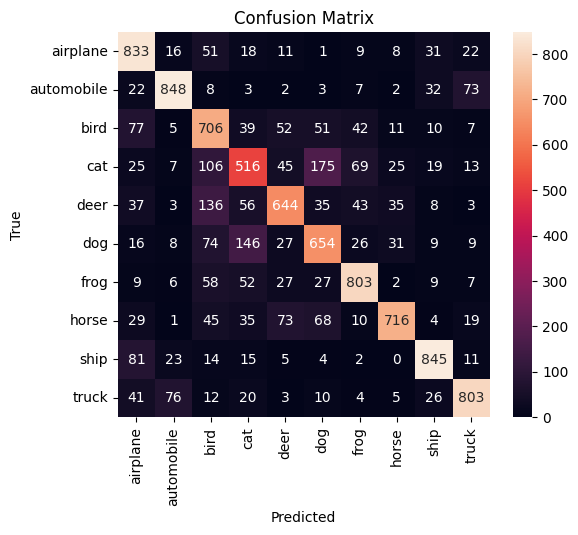

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


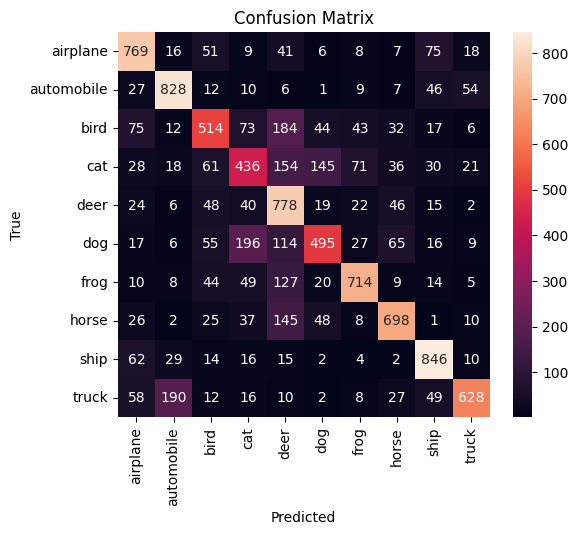

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


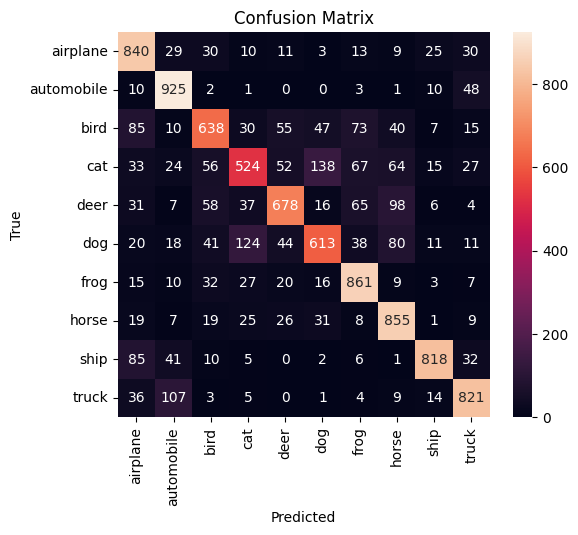

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


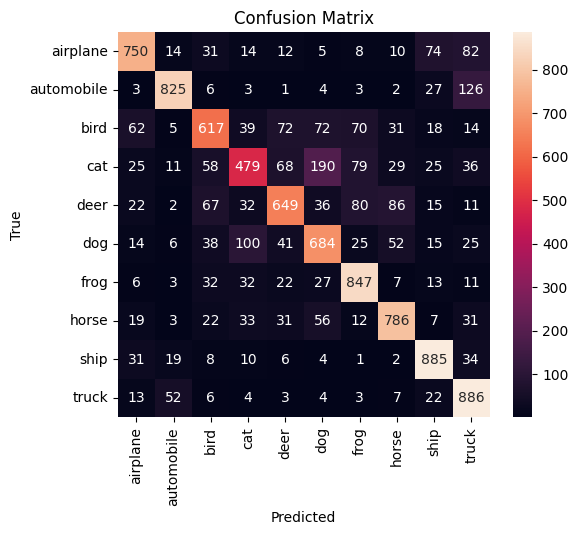

In [65]:
plt_confusion_matrix(load_adm_mrlyr)
plt_confusion_matrix(load_sgd_mrlyr)
plt_confusion_matrix(load_adm_aug_mrlyr)
plt_confusion_matrix(load_sgd_aug_mrlyr)

: 

: 